<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Data Wrangling II
Caderno de **Exercícios**<br>
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)
Aluno: Raul Pichinin
---

# **Tópicos**

<ol type="1">
  <li>Agregação e Ordenação;</li>
  <li>Combinação;</li>
  <li>Técnicas Avançadas.</li>
</ol>

---

# **Exercícios**

Neste exercícios, vamos trabalhar com dados geográficos, demográficos e econômicos do Brasil. Vamos manipular e combinar dados de duas frentes distintas para poder responder perguntas de negócios.

## 1\. Data Wrangling

### **1.1. Estados**

O arquivo `estados-bruto.xml` contém informações sobre estados (nome, sigla e região). **Carregue-o na máquina virtual do Google Colab**. Um arquivo do tipo XML é similar a um arquivo do tipo HTML, exemplo do estado do Acre:

```xml
<ESTADO>
  <ID>1</ID>
  <NOME>ACRE</NOME>
  <IDCAPITAL>16</IDCAPITAL>
  <SIGLA>AC</SIGLA>
  <REGIAO>NORTE</REGIAO>
</ESTADO>
```

Utilize o pacote Python `beautifulsoup4` para extrair os dados do arquivo `estados-bruto.xml` providenciado. Salve os dados extraidos no arquivo `estados-limpo.csv` separado por `;`. Exemplo das três primeiras linhas mais o cabeçalho:

```
estado;sigla;regiao
ACRE;AC;NORTE
ALAGOAS;AL;NORDESTE
AMAPA;AP;NORTE
```

**Dica**: Utilize o parser de xml chamado `lxml` do `beautifulsoup4`.

In [273]:
# ler o arquivo estados-bruto.xml, utilize o xml parser chamado lxml

from bs4 import BeautifulSoup

NOME_ARQUIVO_FONTE = 'estados-bruto.xml'

fonte = BeautifulSoup(open('estados-bruto.xml', mode='r'),'xml')


In [274]:
# visualize os resultados

fonte

<?xml version="1.0" encoding="utf-8"?>
<ESTADOS>
<ESTADO>
<ID>1</ID>
<NOME>ACRE</NOME>
<IDCAPITAL>16</IDCAPITAL>
<SIGLA>AC</SIGLA>
<REGIAO>NORTE</REGIAO>
</ESTADO>
<ESTADO>
<ID>2</ID>
<NOME>ALAGOAS</NOME>
<IDCAPITAL>68</IDCAPITAL>
<SIGLA>AL</SIGLA>
<REGIAO>NORDESTE</REGIAO>
</ESTADO>
<ESTADO>
<ID>3</ID>
<NOME>AMAPA</NOME>
<IDCAPITAL>131</IDCAPITAL>
<SIGLA>AP</SIGLA>
<REGIAO>NORTE</REGIAO>
</ESTADO>
<ESTADO>
<ID>4</ID>
<NOME>AMAZONAS</NOME>
<IDCAPITAL>178</IDCAPITAL>
<SIGLA>AM</SIGLA>
<REGIAO>NORTE</REGIAO>
</ESTADO>
<ESTADO>
<ID>5</ID>
<NOME>BAHIA</NOME>
<IDCAPITAL>536</IDCAPITAL>
<SIGLA>BA</SIGLA>
<REGIAO>NORDESTE</REGIAO>
</ESTADO>
<ESTADO>
<ID>6</ID>
<NOME>CEARA</NOME>
<IDCAPITAL>676</IDCAPITAL>
<SIGLA>CE</SIGLA>
<REGIAO>NORDESTE</REGIAO>
</ESTADO>
<ESTADO>
<ID>7</ID>
<NOME>DISTRITO FEDERAL</NOME>
<IDCAPITAL>916</IDCAPITAL>
<SIGLA>DF</SIGLA>
<REGIAO>CENTRO-OESTE</REGIAO>
</ESTADO>
<ESTADO>
<ID>8</ID>
<NOME>ESPIRITO SANTO</NOME>
<IDCAPITAL>879</IDCAPITAL>
<SIGLA>ES</SIGLA>
<REGIAO>SU

In [275]:
# manipule os dados

estados = []

for linha in fonte.find_all('ESTADO'):
  Id = linha.find('ID').get_text()
  nome = linha.find('NOME').get_text()
  Id_capital = linha.find('IDCAPITAL').get_text()
  Sigla = linha.find('SIGLA').get_text()
  Regiao = linha.find('REGIAO').get_text()

  estados.append([nome, Sigla, Regiao])

print(estados)



[['ACRE', 'AC', 'NORTE'], ['ALAGOAS', 'AL', 'NORDESTE'], ['AMAPA', 'AP', 'NORTE'], ['AMAZONAS', 'AM', 'NORTE'], ['BAHIA', 'BA', 'NORDESTE'], ['CEARA', 'CE', 'NORDESTE'], ['DISTRITO FEDERAL', 'DF', 'CENTRO-OESTE'], ['ESPIRITO SANTO', 'ES', 'SUDESTE'], ['GOIAS', 'GO', 'CENTRO-OESTE'], ['MARANHAO', 'MA', 'NORDESTE'], ['MATO GROSSO', 'MT', 'CENTRO-OESTE'], ['MATO GROSSO DO SUL', 'MS', 'CENTRO-OESTE'], ['PARA', 'PA', 'NORTE'], ['PARAIBA', 'PB', 'NORDESTE'], ['PARANA', 'PR', 'SUL'], ['PERNAMBUCO', 'PE', 'NORDESTE'], ['PIAUI', 'PI', 'NORDESTE'], ['RIO DE JANEIRO', 'RJ', 'SUDESTE'], ['RIO GRANDE DO NORTE', 'RN', 'NORDESTE'], ['RIO GRANDE DO SUL', 'RS', 'SUL'], ['RONDONIA', 'RO', 'NORTE'], ['RORAIMA', 'RR', 'NORTE'], ['SANTA CATARINA', 'SC', 'SUL'], ['SAO PAULO', 'SP', 'SUDESTE'], ['SERGIPE', 'SE', 'NORDESTE'], ['TOCANTINS', 'TO', 'NORTE'], ['MINAS GERAIS', 'MG', 'SUDESTE']]


In [276]:
# escrever o conteudo extraido no arquivo estados-limpo.csv separados por ;
import csv

header = ['estado','UF','regiao']

with open(file='estados-limpo.csv', mode='w', encoding='utf8') as arquivo:
  escritor_csv = csv.writer(arquivo, delimiter=',')
  escritor_csv.writerow(header)
  escritor_csv.writerows(estados)






### **1.2. Cidades**

O arquivo `cidades-bruto.csv` contém informações demográficas e socioeconomicas das cidades do Brasil. **Carregue-o na máquina virtual do Google Colab**. Utilize o pacote Python `pandas` para extrair os dados do arquivo `cidades-bruto.xml` providenciado. Seguindo as seguintes especificações:

1. Apenas dados do censo de 2010;
1. Apenas as colunas UF, Nome, PIB, Pop_est_2009 e PIB_percapita.

Salve os dados extraidos no arquivo `cidades-limpo.csv` separado por `;`. Exemplo das três primeiras linhas mais o cabeçalho:

```
estado;cidade;populacao;pib;pib_percapita
BAHIA;TREMEDAL;18433;57883.9921875;3140.23999023
RIO GRANDE DO SUL;TURUÇU;4000;45723875;11430.96972656
ESPIRITO SANTO;VITÓRIA;320156;19782628;61790.58984375
```

In [277]:
# ler o arquivo cidades-bruto.csv

import pandas as pd
fonte_df = pd.read_csv('cidades-bruto.csv', sep=',')

In [278]:
# visualize os resultados
fonte_df.head()


,FID,gid,UF,nome,Censo,PIB,Pop_est_2009,PIB_percapita,Descrição,legenda,classe,geom
0,vw_pib_percapita.fid-4514e25a_17aaa325034_-258f,215,BAHIA,Tremedal,2010.0,5.788399e+04,18433,3140.239990,Produto Interno Bruto per capita,- 9639.65,1,MULTIPOLYGON (((-41.458803305191566 -14.781415...
1,vw_pib_percapita.fid-4514e25a_17aaa325034_-258e,306,RIO GRANDE DO SUL,Turuçu,2010.0,4.572388e+04,4000,11430.969727,Produto Interno Bruto per capita,9639.65 - 22144.80,2,MULTIPOLYGON (((-52.035349932081274 -31.567509...
2,vw_pib_percapita.fid-4514e25a_17aaa325034_-258d,900,ESPIRITO SANTO,Vitória,2010.0,1.978263e+07,320156,61790.589844,Produto Interno Bruto per capita,52702.10 - 133669.00,4,MULTIPOLYGON (((-40.3292566978242 -20.23997417...
3,vw_pib_percapita.fid-4514e25a_17aaa325034_-258c,3613,MINAS GERAIS,Jacutinga,2010.0,2.478160e+05,21424,11567.209961,Produto Interno Bruto per capita,9639.65 - 22144.80,2,MULTIPOLYGON (((-46.50528160015326 -22.3400120...
4,vw_pib_percapita.fid-4514e25a_17aaa325034_-258b,1028,PIAUÍ,Nazária,2010.0,2.095138e+04,7895,2653.750000,Produto Interno Bruto per capita,- 9639.65,1,POLYGON ((-42.826685407155495 -5.3480291684437...


In [279]:
# manipule os dados
cidades_limpo_df = fonte_df[fonte_df['Censo']== 2010.0][['nome', 'UF', 'PIB', 'Pop_est_2009', 'PIB_percapita']]
cidades_limpo_df.rename(columns={'UF': 'estado'}, inplace= True)
cidades_limpo_df.rename(columns={'nome': 'cidade'}, inplace= True)
cidades_limpo_df



,cidade,estado,PIB,Pop_est_2009,PIB_percapita
0,Tremedal,BAHIA,5.788399e+04,18433,3140.239990
1,Turuçu,RIO GRANDE DO SUL,4.572388e+04,4000,11430.969727
2,Vitória,ESPIRITO SANTO,1.978263e+07,320156,61790.589844
3,Jacutinga,MINAS GERAIS,2.478160e+05,21424,11567.209961
4,Nazária,PIAUÍ,2.095138e+04,7895,2653.750000
...,...,...,...,...,...
5561,Campo Erê,SANTA CATARINA,1.876289e+05,9737,19269.679688
5562,Planalto,PARANÁ,1.385535e+05,13983,9908.709961
5563,Guararapes,SÃO PAULO,5.320191e+05,29639,17949.970703
5564,Barra do Guarita,RIO GRANDE DO SUL,2.198064e+04,3067,7166.819824


In [280]:
# escrever o conteudo extraido no arquivo cidades-limpo.csv separados por ;

with open(file='./cidades-limpo.csv', mode='w', encoding='utf8') as arquivo_csv:
  escritor_csv = csv.writer(arquivo_csv, delimiter=';')
  cidades_limpo_df.to_csv('cidades-limpo.csv', index=False)





### **1.3. Brasil**

Utilize o pacote Python `pandas` para combinar os dados do arquivo `estados-limpo.csv` com os dados do arquivo `cidades-limpo.csv` em um único dataframe. Escolha a coluna e o método de combinação de tal forma que **não haja perda de dados** no processo (não produzirá valores nulos `NaN`). Salve os dados do dataframe no arquivo `brasil.csv`

In [281]:
# solução do exercício 1.3

estados_df = pd.read_csv('estados-limpo.csv',sep=',')
cidades_df = pd.read_csv('cidades-limpo.csv',sep=',')


In [282]:
estados_df

,estado,UF,regiao
0,ACRE,AC,NORTE
1,ALAGOAS,AL,NORDESTE
2,AMAPA,AP,NORTE
3,AMAZONAS,AM,NORTE
4,BAHIA,BA,NORDESTE
5,CEARA,CE,NORDESTE
6,DISTRITO FEDERAL,DF,CENTRO-OESTE
7,ESPIRITO SANTO,ES,SUDESTE
8,GOIAS,GO,CENTRO-OESTE
9,MARANHAO,MA,NORDESTE


In [283]:
!pip install unidecode

In [284]:
from unidecode import unidecode

def remover_acentos(texto):
    if isinstance(texto, str):
        return unidecode(texto)
    else:
        return texto

cidades_df = cidades_df.applymap(remover_acentos)
cidades_df

,cidade,estado,PIB,Pop_est_2009,PIB_percapita
0,Tremedal,BAHIA,5.788399e+04,18433,3140.239990
1,Turucu,RIO GRANDE DO SUL,4.572388e+04,4000,11430.969727
2,Vitoria,ESPIRITO SANTO,1.978263e+07,320156,61790.589844
3,Jacutinga,MINAS GERAIS,2.478160e+05,21424,11567.209961
4,Nazaria,PIAUI,2.095138e+04,7895,2653.750000
...,...,...,...,...,...
5550,Campo Ere,SANTA CATARINA,1.876289e+05,9737,19269.679688
5551,Planalto,PARANA,1.385535e+05,13983,9908.709961
5552,Guararapes,SAO PAULO,5.320191e+05,29639,17949.970703
5553,Barra do Guarita,RIO GRANDE DO SUL,2.198064e+04,3067,7166.819824


---

In [285]:
juntos_df = pd.merge(left=cidades_df, right=estados_df, on='estado', how='inner')
juntos_df

,cidade,estado,PIB,Pop_est_2009,PIB_percapita,UF,regiao
0,Tremedal,BAHIA,5.788399e+04,18433,3140.239990,BA,NORDESTE
1,Maetinga,BAHIA,2.355845e+04,7884,2988.129883,BA,NORDESTE
2,Ibirapua,BAHIA,7.499741e+04,7893,9501.759766,BA,NORDESTE
3,Governador Mangabeira,BAHIA,9.290382e+04,20668,4495.060059,BA,NORDESTE
4,Ibitita,BAHIA,6.236689e+04,19410,3213.129883,BA,NORDESTE
...,...,...,...,...,...,...,...
5550,Serra do Navio,AMAPA,1.097953e+05,3982,27572.900391,AP,NORTE
5551,Ferreira Gomes,AMAPA,6.993773e+04,5475,12774.009766,AP,NORTE
5552,Tartarugalzinho,AMAPA,1.199880e+05,13769,8714.360352,AP,NORTE
5553,Macapa,AMAPA,4.679694e+06,366484,12769.160156,AP,NORTE


In [286]:
with open(file='./brasil.csv', mode='w', encoding='utf8'):
  juntos_df.to_csv('brasil.csv', index=False)

## 2\. Data Analytics

### **2.1. DataFrame**

Utilize o pacote Python `pandas` para carregar o arquivo `brasil.csv` no dataframe `brasil_df`.

In [287]:
# solução do exercício 2.1

brasil_df = pd.read_csv('brasil.csv')
brasil_df

,cidade,estado,PIB,Pop_est_2009,PIB_percapita,UF,regiao
0,Tremedal,BAHIA,5.788399e+04,18433,3140.239990,BA,NORDESTE
1,Maetinga,BAHIA,2.355845e+04,7884,2988.129883,BA,NORDESTE
2,Ibirapua,BAHIA,7.499741e+04,7893,9501.759766,BA,NORDESTE
3,Governador Mangabeira,BAHIA,9.290382e+04,20668,4495.060059,BA,NORDESTE
4,Ibitita,BAHIA,6.236689e+04,19410,3213.129883,BA,NORDESTE
...,...,...,...,...,...,...,...
5550,Serra do Navio,AMAPA,1.097953e+05,3982,27572.900391,AP,NORTE
5551,Ferreira Gomes,AMAPA,6.993773e+04,5475,12774.009766,AP,NORTE
5552,Tartarugalzinho,AMAPA,1.199880e+05,13769,8714.360352,AP,NORTE
5553,Macapa,AMAPA,4.679694e+06,366484,12769.160156,AP,NORTE


### **2.2. Analise**

Utilize o dataframe `brasil_df` para responder as seguintes perguntas de negócio:

 - Quais são as 10 cidades mais populosas do Brasil?

In [288]:
cidades_populosas_df = brasil_df.sort_values('Pop_est_2009', ascending= False).head(n=10)
cidades_populosas_df

,cidade,estado,PIB,Pop_est_2009,PIB_percapita,UF,regiao
3271,Sao Paulo,SAO PAULO,389317152.0,11037593,35271.929688,SP,SUDESTE
4504,Rio de Janeiro,RIO DE JANEIRO,175739344.0,6186710,28405.949219,RJ,SUDESTE
44,Salvador,BAHIA,32824228.0,2998056,10948.500000,BA,NORDESTE
5554,Brasilia,DISTRITO FEDERAL,131487264.0,2606885,50438.460938,DF,CENTRO-OESTE
4221,Fortaleza,CEARA,31789186.0,2505552,12687.500000,CE,NORDESTE
1735,Belo Horizonte,MINAS GERAIS,44595204.0,2452617,18182.699219,MG,SUDESTE
4849,Curitiba,PARANA,45762420.0,1851215,24720.210938,PR,SUL
3720,Manaus,AMAZONAS,40486108.0,1738641,23286.060547,AM,NORTE
2435,Recife,PERNAMBUCO,24835340.0,1561659,15903.179688,PE,NORDESTE
2624,Belem,PARA,16526989.0,1437600,11496.240234,PA,NORTE


 - Quais são as 5 cidades com a menor PIB per capita da região nordeste?

In [289]:
pib_nordeste_df = brasil_df[brasil_df['regiao'] == 'NORDESTE'].sort_values('PIB', ascending=True).head(n=5)
pib_nordeste_df

,cidade,estado,PIB,Pop_est_2009,PIB_percapita,UF,regiao
2022,Santo Antonio dos Milagres,PIAUI,5770.282227,2032,2839.709961,PI,NORDESTE
1896,Sao Miguel da Baixa Grande,PIAUI,7714.598145,2153,3583.189941,PI,NORDESTE
3403,Quixaba,PARAIBA,8294.528320,1488,5574.279785,PB,NORDESTE
1939,Miguel Leao,PIAUI,8365.680664,1212,6902.379883,PI,NORDESTE
2059,Sao Luis do Piaui,PIAUI,8445.269531,2687,3143.010010,PI,NORDESTE


 - Quais são as 15 cidades com maior PIB do do estado de São Paulo?

In [290]:
maior_pib_sp_df = brasil_df[brasil_df['estado'] == 'SAO PAULO'].sort_values('PIB', ascending=False).head(n=15)
maior_pib_sp_df

,cidade,estado,PIB,Pop_est_2009,PIB_percapita,UF,regiao
3271,Sao Paulo,SAO PAULO,389317152.0,11037593,35271.929688,SP,SUDESTE
3223,Guarulhos,SAO PAULO,32473828.0,1299283,24993.650391,SP,SUDESTE
3340,Campinas,SAO PAULO,31654720.0,1064669,29731.980469,SP,SUDESTE
3106,Osasco,SAO PAULO,31616452.0,718646,43994.468750,SP,SUDESTE
2810,Sao Bernardo do Campo,SAO PAULO,28935768.0,810979,35680.050781,SP,SUDESTE
3344,Barueri,SAO PAULO,26908070.0,270173,99595.703125,SP,SUDESTE
2768,Santos,SAO PAULO,22546134.0,417098,54054.761719,SP,SUDESTE
2994,Sao Jose dos Campos,SAO PAULO,22018042.0,615871,35751.058594,SP,SUDESTE
3014,Jundiai,SAO PAULO,16585137.0,349929,47395.718750,SP,SUDESTE
2816,Santo Andre,SAO PAULO,14709603.0,673396,21843.910156,SP,SUDESTE


 - Qual é o PIB do estado de Santa Catarina?

In [291]:
pib_sc_df = brasil_df[brasil_df['estado'] == 'SANTA CATARINA']['PIB'].agg('sum')
pib_sc_df

129806256.75195317

 - Qual é o população da região sul?

In [292]:
populacao_sul_df = brasil_df[brasil_df['regiao'] == 'SUL']['Pop_est_2009'].agg('sum')
populacao_sul_df

27719118

 - Qual é o PIB per capito médio das cidades do Mato Grosso do Sul?

In [293]:
pib_percapta_medio_ms_df = brasil_df[brasil_df['estado'] == 'MATO GROSSO DO SUL']['PIB_percapita'].agg('mean')

pib_percapta_medio_ms_df

14458.896859975644

 - Qual é a população do Brasil?

In [294]:
populacao_brasil_df = brasil_df['Pop_est_2009'].agg('sum')
populacao_brasil_df

191176146

### **2.3. Visualização**

Utilize o dataframe `brasil_df` para gerar as seguintes visualizações.

 - Gere um gráfico de barras com as 10 cidades menos populosas do Brasil.

<Axes: xlabel='Cidades menos populosas'>

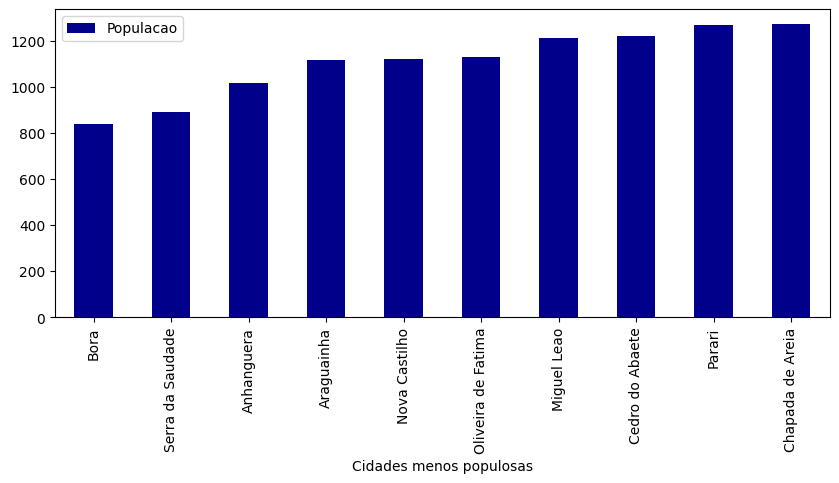

In [295]:
import matplotlib.pyplot as plt

menos_populosas_df = brasil_df.sort_values('Pop_est_2009', ascending=True).head(n=10)
menos_populosas_df.rename(columns={'Pop_est_2009': 'Populacao'}, inplace= True)
menos_populosas_df.rename(columns={'cidade': 'Cidades menos populosas'}, inplace= True)
menos_populosas_df.plot(kind='bar',x='Cidades menos populosas',y='Populacao',figsize=(10,4),color='darkblue')



 - Gere um gráfico de pizza com a proporção da população do Brasil por região.

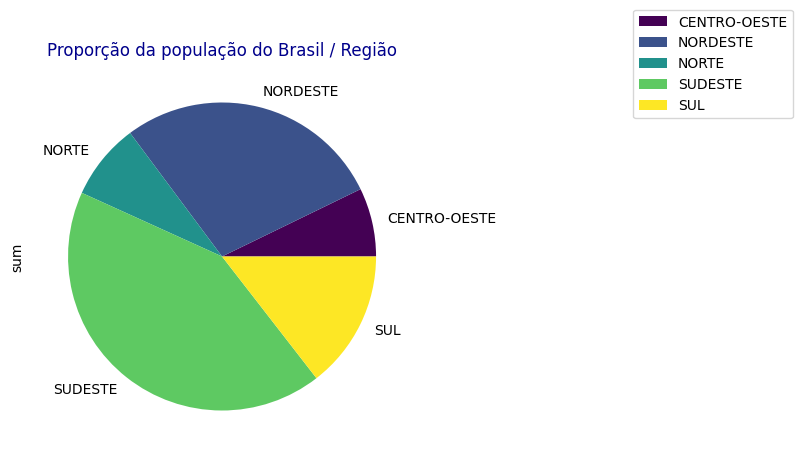

In [296]:
populacao_por_regiao_df = brasil_df[['regiao', 'Pop_est_2009']]
populacao_por_regiao_df = populacao_por_regiao_df.groupby(['regiao'])['Pop_est_2009'].agg(['sum'])
populacao_por_regiao_df.plot.pie(y='sum',figsize=(10,5), colormap= 'viridis')
plt.title('Proporção da população do Brasil / Região', color = 'darkblue')
plt.legend(loc='right', bbox_to_anchor=(2, 1))


